In [42]:
import pandas as pd 

In [52]:
df = pd.read_csv(r"D:\MACHINE LEARNING\new_ml_test\dsjob - dsjob.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [53]:
x  = df.drop(columns=['training_hours'])
y = df['training_hours']
X = df.copy()

In [54]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [55]:
# Automatically detect column types
num = df.select_dtypes(include=["int64", "float64"]).columns
num

Index(['enrollee_id', 'city_development_index', 'training_hours'], dtype='str')

In [56]:
cat = df.select_dtypes(include=['object','category']).columns
cat

C:\Users\HP\AppData\Local\Temp\ipykernel_9532\289313241.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat = df.select_dtypes(include=['object','category']).columns


Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='str')

In [65]:
ct = ColumnTransformer(transformers=[
    ('numeric',StandardScaler(),num),
    ('cate',OneHotEncoder(drop='first',handle_unknown='ignore'),cat)
])

In [66]:
a = ct.fit_transform(X)

In [67]:
a.shape

(2129, 170)

In [60]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [61]:
x = df.drop(columns=['training_hours'])
y = df['training_hours']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=78)

In [64]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2129, 13)
(1703, 12)
(426, 12)
(1703,)
(426,)


In [99]:
df = pd.read_csv(r"D:\MACHINE LEARNING\new_ml_test\covid_toy - covid_toy.csv")
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [100]:
# SPLIT DATA
X = df.drop(columns = ['has_covid' ])
y = df['has_covid' ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
random_state=42)

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [102]:
# Define the columns that need to be preprocessed
categorical_features = ['gender', 'city' ]
numeric_features = ['age', 'fever' ]

In [103]:
# Create transformers
numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())

])

categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(handle_unknown='ignore' ))

])

# Combine transformers
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)

])

In [104]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [107]:
df_new = pd.read_csv(r"D:\MACHINE LEARNING\new_ml_test\dsjob - dsjob.csv")
df_new.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98


In [109]:
df_new.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [117]:
lab = [i for i in df_new.columns if df_new[i].isnull().mean() < 0.10 and df_new[i].isnull().mean() > 0]
lab

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [118]:
len( df_new[lab].dropna() ) / len(df_new)

0.9478628464067638

In [119]:
df_new1 = df_new[lab].dropna()
df_new.shape, df_new1.shape

((2129, 13), (2018, 4))

In [120]:
import matplotlib.pyplot as plt 

<Axes: >

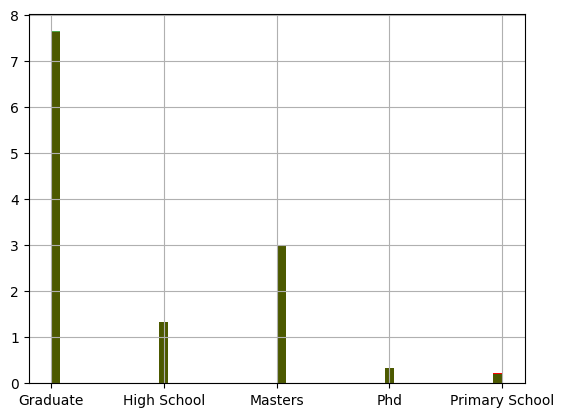

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_new['education_level'].hist( bins=50, ax=ax, density=True, color='red')

df_new1['education_level'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.7)


In [128]:
df_new.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [129]:
cat = df_new.select_dtypes(include=['category','object']).columns.tolist()

C:\Users\HP\AppData\Local\Temp\ipykernel_9532\4090826403.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat = df_new.select_dtypes(include=['category','object']).columns.tolist()


In [131]:
from sklearn.preprocessing import LabelEncoder

for i in cat:
    le = LabelEncoder()
    df_new[i] = le.fit_transform(df_new[i])
    

In [132]:
df_new.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,69,0.827,1,0,0,0,5,19,7,6,0,21
1,9858,5,0.920,0,0,2,0,5,15,8,5,0,98
2,31806,55,0.624,1,1,2,1,6,20,8,5,5,15


In [134]:
x = df_new.drop(columns=['training_hours'])


In [137]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [140]:
ft = FunctionTransformer(np.square)
a = ft.fit_transform(x)

In [141]:
a

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,1049954409,4761,0.683929,1,0,0,0,25,361,49,36,0
1,97180164,25,0.846400,0,0,4,0,25,225,64,25,0
2,1011621636,3025,0.389376,1,1,4,1,36,400,64,25,25
3,749938225,484,0.683929,1,0,4,4,25,4,0,25,0
4,768620176,25,0.846400,1,0,4,0,25,441,9,25,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1661521,25,0.846400,1,1,4,0,4,49,64,16,9
2125,38025,625,0.804609,1,0,4,4,25,81,64,36,1
2126,1008824644,4,0.786769,1,1,4,16,36,169,64,25,25
2127,61984129,16,0.646416,1,0,0,1,36,289,1,16,0
